# Business Understanding

### Background
   Seattle tourism is booming and the housing price of Seattle is attractive. Investing now will likely guarantee a return in value. Airbnb investing be a viable option for real estate investors. 
### Business Objectives:
   Which neigborhood and what type of properties will more likely guarantee a return in value in Airbnb investment?
### Data Mining Goal:
#### To make better investing decision, a few key factors should be considered and analyzed first: 
   * market saturation across neighborhoods<br/>
   * visitors’ rating on location <br/>
   * occupancy rates and monthly revenues across neighborhoods<br/>
   * occupancy rates and monthly revenues by property types<br/>

####  Data mining success criteria
   * Define features of listings/calendars that have strong relationships with price

### Project Plan
#### Gather
* Data source: Airbnb data for Seattle<br/>

#### Assess
* Describe data<br/>
* Explore data for useful features<br/>

#### Clean
* Select required subset of data<br/>
* Preprocess categorical data<br/>
* Preprocess missing data<br/>

#### Analyze
* Analyze data for answering relevant questions<br/>

#### Visualize
* Visualize findings<br/>

#### Results
* Formulate the answers for the business data mining process

# Data Understanding

## Collect initial data

In [345]:
#Import libaries and read the listing table
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


df = pd.read_csv('C:/Users/Nancy Zhao/Desktop/Nano degrees/Data science/CRISP-DM/data science blog post/listings.csv')
# remove columns with missing values more than 40%
columns = df.columns
columns = columns[(len(df) - df.count()) / len(df) < 0.4]
df = df[columns]

#read the calendar table
df1 = pd.read_csv('C:/Users/Nancy Zhao/Desktop/Nano degrees/Data science/CRISP-DM/data science blog post/calendar.csv')

#merge the listing table and the calendar table by id
df2 = pd.merge(df, df1, left_on = 'id', right_on = 'listing_id')

## Describe and explore data

In [346]:
# Describe and explore df
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
 

In [347]:
df = df[['id', 'host_response_rate', 'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds','price', 'review_scores_rating', 'review_scores_location','cancellation_policy']]
df.head()

,id,host_response_rate,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,review_scores_rating,review_scores_location,cancellation_policy
0,241032,96%,West Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,$85.00,95.0,9.0,moderate
1,953595,98%,West Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,$150.00,96.0,10.0,strict
2,3308979,67%,West Queen Anne,House,Entire home/apt,11,4.5,5.0,7.0,$975.00,97.0,10.0,strict
3,7421966,NaN,West Queen Anne,Apartment,Entire home/apt,3,1.0,0.0,2.0,$100.00,NaN,NaN,flexible
4,278830,100%,West Queen Anne,House,Entire home/apt,6,2.0,3.0,3.0,$450.00,92.0,9.0,strict


In [348]:
#check dtypes and see whether it is necessary to do conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 13 columns):
id                        3818 non-null int64
host_response_rate        3295 non-null object
neighbourhood_cleansed    3818 non-null object
property_type             3817 non-null object
room_type                 3818 non-null object
accommodates              3818 non-null int64
bathrooms                 3802 non-null float64
bedrooms                  3812 non-null float64
beds                      3817 non-null float64
price                     3818 non-null object
review_scores_rating      3171 non-null float64
review_scores_location    3163 non-null float64
cancellation_policy       3818 non-null object
dtypes: float64(5), int64(2), object(6)
memory usage: 387.8+ KB


In [349]:
# get numeric variables
num_vars = df.select_dtypes(include = ['float64', 'int64']).columns
num_vars

Index(['id', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'review_scores_rating', 'review_scores_location'],
      dtype='object')

In [350]:
df[num_vars].describe()

,id,accommodates,bathrooms,bedrooms,beds,review_scores_rating,review_scores_location
count,3.818000e+03,3818.000000,3802.000000,3812.000000,3817.000000,3171.000000,3163.000000
mean,5.550111e+06,3.349398,1.259469,1.307712,1.735394,94.539262,9.608916
std,2.962660e+06,1.977599,0.590369,0.883395,1.139480,6.606083,0.629053
min,3.335000e+03,1.000000,0.000000,0.000000,1.000000,20.000000,4.000000
25%,3.258256e+06,2.000000,1.000000,1.000000,1.000000,93.000000,9.000000
50%,6.118244e+06,3.000000,1.000000,1.000000,1.000000,96.000000,10.000000
75%,8.035127e+06,4.000000,1.000000,2.000000,2.000000,99.000000,10.000000
max,1.034016e+07,16.000000,8.000000,7.000000,15.000000,100.000000,10.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC19623E80>,
      dtype=object)

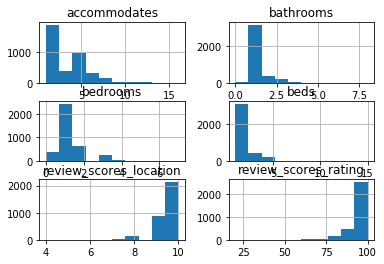

In [351]:
df_num = df[num_vars].drop(['id'], axis = 1)
df_num.hist()

In [352]:
df_num.head()

,accommodates,bathrooms,bedrooms,beds,review_scores_rating,review_scores_location
0,4,1.0,1.0,1.0,95.0,9.0
1,4,1.0,1.0,1.0,96.0,10.0
2,11,4.5,5.0,7.0,97.0,10.0
3,3,1.0,0.0,2.0,NaN,NaN
4,6,2.0,3.0,3.0,92.0,9.0


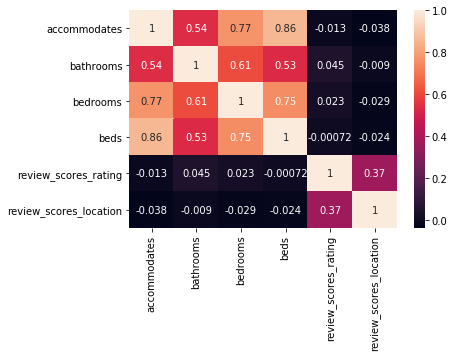

In [353]:
sns.heatmap(df_num.corr(), annot = True)

In [354]:
# get categorical variables
obj_vars = df.select_dtypes(include = ['object']).columns
obj_vars

Index(['host_response_rate', 'neighbourhood_cleansed', 'property_type',
       'room_type', 'price', 'cancellation_policy'],
      dtype='object')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC19502588>],
      dtype=object)

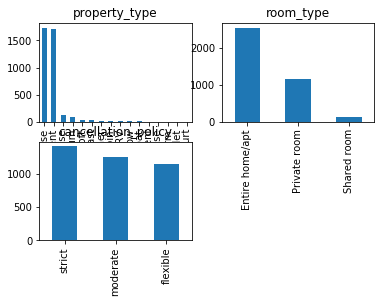

In [355]:
obj_var_list = ['neighbourhood_cleansed','property_type', 'room_type', 'cancellation_policy']
df_obj = df[obj_var_list]

def bar_group(df, list_variable):
    '''
    Description: plot bar graphs for a list of categorical variables.
    Arguments:
        df: dataset
        list_variable: a list of categorical variables
    Return:
        a set of bar plots
    '''
    j = 1
    for i in list_variable:
        plt.subplot(2,2,j)
        graph = df[i].value_counts().plot(kind = 'bar', subplots = True)
        j+=1
    return graph
bar_group(df_obj,['property_type', 'room_type', 'cancellation_policy'])

In [356]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [357]:
df1.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [358]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393570 entries, 0 to 1393569
Data columns (total 90 columns):
id                                  1393570 non-null int64
listing_url                         1393570 non-null object
scrape_id                           1393570 non-null int64
last_scraped                        1393570 non-null object
name                                1393570 non-null object
summary                             1328965 non-null object
space                               1185885 non-null object
description                         1393570 non-null object
experiences_offered                 1393570 non-null object
neighborhood_overview               1016890 non-null object
transit                             1052660 non-null object
thumbnail_url                       1276770 non-null object
medium_url                          1276770 non-null object
picture_url                         1393570 non-null object
xl_picture_url                      1276770 non-n

In [359]:
df2.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,listing_id,date,available,price_y
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,moderate,f,f,2,4.07,241032,2016-01-04,t,$85.00
1,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,moderate,f,f,2,4.07,241032,2016-01-05,t,$85.00
2,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,moderate,f,f,2,4.07,241032,2016-01-06,f,NaN
3,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,moderate,f,f,2,4.07,241032,2016-01-07,f,NaN
4,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,moderate,f,f,2,4.07,241032,2016-01-08,f,NaN


In [360]:
# check dtypes for the variables and see whether a conversion is needed.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 13 columns):
id                        3818 non-null int64
host_response_rate        3295 non-null object
neighbourhood_cleansed    3818 non-null object
property_type             3817 non-null object
room_type                 3818 non-null object
accommodates              3818 non-null int64
bathrooms                 3802 non-null float64
bedrooms                  3812 non-null float64
beds                      3817 non-null float64
price                     3818 non-null object
review_scores_rating      3171 non-null float64
review_scores_location    3163 non-null float64
cancellation_policy       3818 non-null object
dtypes: float64(5), int64(2), object(6)
memory usage: 387.8+ KB


# Data Preparation

## Data prepration for the listing table

In [361]:
# Convert a few strings to floats
df['host_response_rate_val'] = df['host_response_rate'].str.rstrip('%').astype(float)/100
df['price_val'] = df['price'].str.lstrip('$').str.replace(',', '').astype(float)

In [362]:
#how many missing values each variable has?
for num_var in num_vars:
    print(str(num_var) + ' ' + str(df[num_var].isnull().sum()))

id 0
accommodates 0
bathrooms 16
bedrooms 6
beds 1
review_scores_rating 647
review_scores_location 655


In [363]:
#replace NAs using means for numeric variable
for num_var in num_vars:
    df[num_var].fillna(df[num_var].mean(), inplace = True)

In [364]:
#check whether they are replaced
for num_var in num_vars:
    print(str(num_var) + ' ' + str(df[num_var].isnull().sum()))

id 0
accommodates 0
bathrooms 0
bedrooms 0
beds 0
review_scores_rating 0
review_scores_location 0


In [365]:
df.head()

,id,host_response_rate,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,review_scores_rating,review_scores_location,cancellation_policy,host_response_rate_val,price_val
0,241032,96%,West Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,$85.00,95.000000,9.000000,moderate,0.96,85.0
1,953595,98%,West Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,$150.00,96.000000,10.000000,strict,0.98,150.0
2,3308979,67%,West Queen Anne,House,Entire home/apt,11,4.5,5.0,7.0,$975.00,97.000000,10.000000,strict,0.67,975.0
3,7421966,NaN,West Queen Anne,Apartment,Entire home/apt,3,1.0,0.0,2.0,$100.00,94.539262,9.608916,flexible,NaN,100.0
4,278830,100%,West Queen Anne,House,Entire home/apt,6,2.0,3.0,3.0,$450.00,92.000000,9.000000,strict,1.00,450.0


## Data preparation for the calendar table

In [366]:
#Convert date_trans to datetime type, slice the data of 2016, convert 'available' from "t and f" to "0 and 1"
df1['date_trans'] = pd.to_datetime(df1['date'])
df1['date_month'] = df1['date_trans'].apply(lambda x: x.strftime('%m'))

df1 = df1[(df1['date_trans'] >= pd.datetime(2016,1,1)) & (df1['date_trans'] <= pd.datetime(2016,12,31))]
df1['available_bool'] = np.where(df1['available'].str.contains('f'), 1,0)

# Modeling/Analysis

## Question 1: Number of Airbnb properties by neighborhood

In [367]:
#How many Airbnb properties in Seattle
total_properties = len(np.unique(df['id']))
total_properties

3818

In [368]:
#Create groupby_stats() function:
def groupby_stats(df, method, stats_var, grouping_var):
    ''' Description: group stats_var by grouping_var and conduct statistical analysis on stats_var
        Arguments:
            df: dataset
            method: statistical method to use
            stats_var: the variable to be analyzed
            grouping_var: the variable used to do grouping
        Return:
            a dataframe where the index is the grouping_var, and the values are the statistical values of stats_var
    '''
    df_grouping1 = df.groupby(df[grouping_var])[stats_var]
    
    if method == 'sum':
        df_grouping2 = df_grouping1.sum()
    elif method == 'mean':
        df_grouping2 = df_grouping1.mean()
    elif method == 'count':
        df_grouping2 = df_grouping1.count()
    return pd.DataFrame(df_grouping2.sort_values(ascending = False))
  #  return df_grouping

In [369]:
#number of properties by neighborhood
number_properties = groupby_stats(df, 'count', 'id', 'neighbourhood_cleansed')
number_properties.head()

,id
neighbourhood_cleansed,
Broadway,397
Belltown,234
Wallingford,167
Fremont,158
Minor,135


In [370]:
# number of properties in a few communities
print(number_properties.loc[['Pike-Market', 'Alki', 'Fauntleroy', 'Highland Park', 'South Beacon Hill', 'South Park']])

                        id
neighbourhood_cleansed    
Pike-Market             28
Alki                    42
Fauntleroy              10
Highland Park           11
South Beacon Hill        4
South Park               3


In [371]:
# Market share by neighborhood
proportion_properties = number_properties/number_properties.sum()
proportion_properties = proportion_properties.rename(columns = {'id': 'proportion'})
proportion_properties.head()

,proportion
neighbourhood_cleansed,
Broadway,0.103981
Belltown,0.061289
Wallingford,0.043740
Fremont,0.041383
Minor,0.035359


In [372]:
# Market share for a few communities
proportion_properties.loc[['Montlake', 'Westlake', 'South Lake Union', 'Madrona', 'East Queen Anne', 'North Beach/Blue Ridge', 'Belltown', 'West Queen Anne']]

,proportion
neighbourhood_cleansed,
Montlake,0.004976
Westlake,0.004453
South Lake Union,0.007072
Madrona,0.012310
East Queen Anne,0.021477
North Beach/Blue Ridge,0.003667
Belltown,0.061289
West Queen Anne,0.017025


In [373]:
# Market share for the top three communities
proportion_properties.iloc[0:3].sum()

proportion    0.20901
dtype: float64

## Question 2: Ten top rated neighbourhood by location

In [128]:
rating_by_neighbor = groupby_stats(df, 'mean', 'review_scores_location', 'neighbourhood_cleansed')
rating_by_neighbor

,review_scores_location
neighbourhood_cleansed,
Fauntleroy,9.860892
Laurelhurst,9.860892
Pike-Market,9.858735
Genesee,9.836343
Adams,9.827370
Sunset Hill,9.823708
Central Business District,9.820629
Fremont,9.820342
Lower Queen Anne,9.816885


In [129]:
#Concat rating and number of properties: how saturated the market is in the communities of 'good location'
rating_properties = pd.merge(rating_by_neighbor, number_properties, on = 'neighbourhood_cleansed')
rating_properties.iloc[0:11]

,review_scores_location,id
neighbourhood_cleansed,,
Fauntleroy,9.860892,10
Laurelhurst,9.860892,10
Pike-Market,9.858735,28
Genesee,9.836343,34
Adams,9.827370,70
Sunset Hill,9.823708,18
Central Business District,9.820629,103
Fremont,9.820342,158
Lower Queen Anne,9.816885,94


## Question 3  Occupancy rate and monthly revenue by neighbourhood in 2016

### Calculate the occupancy rate by neighbourhood

In [130]:
df2.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,listing_id,date,available,price_y
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,moderate,f,f,2,4.07,241032,2016-01-04,t,$85.00
1,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,moderate,f,f,2,4.07,241032,2016-01-05,t,$85.00
2,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,moderate,f,f,2,4.07,241032,2016-01-06,f,NaN
3,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,moderate,f,f,2,4.07,241032,2016-01-07,f,NaN
4,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,moderate,f,f,2,4.07,241032,2016-01-08,f,NaN


In [131]:
df2 = pd.merge(df, df1, left_on = 'id', right_on = 'listing_id')
occupancy_neighbour = groupby_stats(df2, 'sum', 'available_bool', 'neighbourhood_cleansed')
total_neighbour = groupby_stats(df2, 'count', 'available_bool', 'neighbourhood_cleansed')
occupancy_rate_neighbour = occupancy_neighbour / total_neighbour
occupancy_rate_neighbour.sort_values(ascending = False, by = ['available_bool'])

,available_bool
neighbourhood_cleansed,
South Lake Union,0.547903
South Beacon Hill,0.497934
North Beach/Blue Ridge,0.485636
Seaview,0.477961
Riverview,0.456267
Montlake,0.437292
Madrona,0.435496
Lower Queen Anne,0.433533
Genesee,0.424567


### Calculate the average price by neighbourhood

In [132]:
price_by_neighbor = groupby_stats(df2, 'mean', 'price_val', 'neighbourhood_cleansed')
price_by_neighbor.sort_values(ascending = False, by = ['price_val'])

,price_val
neighbourhood_cleansed,
Southeast Magnolia,231.705882
Portage Bay,227.857143
Westlake,194.470588
West Queen Anne,187.769231
Montlake,182.789474
Briarcliff,176.571429
Sunset Hill,176.055556
Industrial District,173.333333
Alki,171.619048


In [133]:
#Get prices for a few communities
price_by_neighbor.loc[['Pike-Market', 'Alki', 'Fauntleroy']]

,price_val
neighbourhood_cleansed,
Pike-Market,157.785714
Alki,171.619048
Fauntleroy,164.100000


### Calculate monthly reveunue by neighbourhood

In [134]:
monthly_income_neighbour = pd.DataFrame(30*occupancy_rate_neighbour['available_bool'].multiply(price_by_neighbor['price_val'], axis = "index"))
monthly_income_neighbour = monthly_income_neighbour.rename(columns = {0:'monthly revenue'}).sort_values(ascending = False, by = ['monthly revenue'])
monthly_income_neighbour

,monthly revenue
neighbourhood_cleansed,
Montlake,2397.968911
Westlake,2273.708141
South Lake Union,2226.922423
Madrona,2067.309541
East Queen Anne,1918.052714
North Beach/Blue Ridge,1869.003205
Belltown,1835.467773
West Queen Anne,1829.466771
Lower Queen Anne,1797.453908


### Bar plot the five most profitable Airbnb properties by neighborhood

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Montlake to East Queen Anne
Data columns (total 1 columns):
monthly revenue    5 non-null float64
dtypes: float64(1)
memory usage: 80.0+ bytes


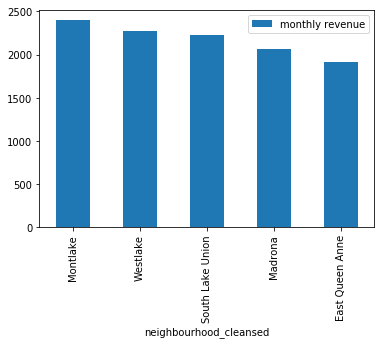

In [135]:
g_income = monthly_income_neighbour.head(n=5)
g_income.info()
g_income.plot.bar()

In [136]:
#Get monthly revenue for a few communities
monthly_income_neighbour.loc[['Broadway', 'Belltown', 'Wallingford', 'Pike-Market', 'Alki', 'Fauntleroy']]

,monthly revenue
neighbourhood_cleansed,
Broadway,1399.024054
Belltown,1835.467773
Wallingford,1150.013860
Pike-Market,1568.542756
Alki,1368.359663
Fauntleroy,1780.688430


In [137]:
#Merge revenue and proportion to see: how profitable the properties are by neighbourhood? How saturated the market is? (Any potential for market entry)
revenue_proportion = pd.merge(monthly_income_neighbour, proportion_properties, on = 'neighbourhood_cleansed')
revenue_proportion

,monthly revenue,proportion
neighbourhood_cleansed,,
Montlake,2397.968911,0.004976
Westlake,2273.708141,0.004453
South Lake Union,2226.922423,0.007072
Madrona,2067.309541,0.012310
East Queen Anne,1918.052714,0.021477
North Beach/Blue Ridge,1869.003205,0.003667
Belltown,1835.467773,0.061289
West Queen Anne,1829.466771,0.017025
Lower Queen Anne,1797.453908,0.024620


## Question 4:  Monthly revenue by property type

### Occupancy rate by property

In [138]:
occupancy_property = groupby_stats(df2, 'sum', 'available_bool', 'property_type')

#df2.groupby(df2['property_type'])['available_bool'].sum()
total_property = groupby_stats(df2, 'count', 'available_bool', 'property_type')
occupancy_rate_property = occupancy_property / total_property
occupancy_rate_property = pd.DataFrame(occupancy_rate_property.sort_values(ascending = False, by = ['available_bool']))
occupancy_rate_property = occupancy_rate_property.rename(columns = {'available_bool' : 'occupancy rate'})
occupancy_rate_property

,occupancy rate
property_type,
Tent,0.522865
Yurt,0.512397
Condominium,0.421790
Dorm,0.418733
Treehouse,0.385675
Townhouse,0.370220
Apartment,0.346604
Cabin,0.337400
Loft,0.322796


### Average price by property

In [139]:
avg_price_property = groupby_stats(df2, 'mean', 'price_val', 'property_type')
avg_price_property = pd.DataFrame(avg_price_property )
avg_price_property = avg_price_property.rename(columns = {'price_val' : 'price per night'})
avg_price_property

,price per night
property_type,
Boat,282.375000
Condominium,151.109890
Loft,135.700000
House,132.351414
Townhouse,129.457627
Apartment,122.932670
Camper/RV,120.461538
Bungalow,115.615385
Bed & Breakfast,112.054054


### Monthly revenue by property

In [140]:
monthly_income_property = pd.DataFrame(30*occupancy_rate_property['occupancy rate'].multiply(avg_price_property['price per night'], axis = "index"))
monthly_income_property = monthly_income_property.rename(columns = {0 : 'monthly revenue'}).sort_values(ascending = False, by = ['monthly revenue'])
monthly_income_property

,monthly revenue
property_type,
Condominium,1912.100716
Boat,1875.693440
Yurt,1537.190083
Townhouse,1437.833766
Loft,1314.103099
Apartment,1278.269447
House,1231.275314
Treehouse,1168.595041
Cabin,1059.435918


In [141]:
#merge monthly revenue, price, occupancy rate by property for better presentation
revenue_property = pd.merge(pd.merge(monthly_income_property,avg_price_property,on = 'property_type'), occupancy_rate_property, on = 'property_type')
revenue_property

,monthly revenue,price per night,occupancy rate
property_type,,,
Condominium,1912.100716,151.109890,0.421790
Boat,1875.693440,282.375000,0.221419
Yurt,1537.190083,100.000000,0.512397
Townhouse,1437.833766,129.457627,0.370220
Loft,1314.103099,135.700000,0.322796
Apartment,1278.269447,122.932670,0.346604
House,1231.275314,132.351414,0.310103
Treehouse,1168.595041,101.000000,0.385675
Cabin,1059.435918,104.666667,0.337400


### Bar plot monthly revenue by property type

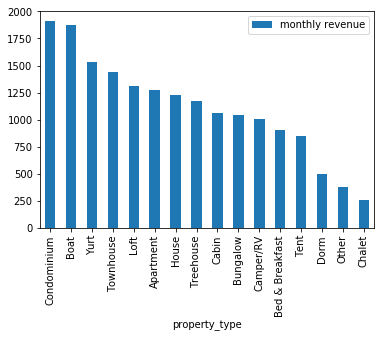

In [142]:
monthly_income_property.plot.bar()

## Question 5: Price prediction

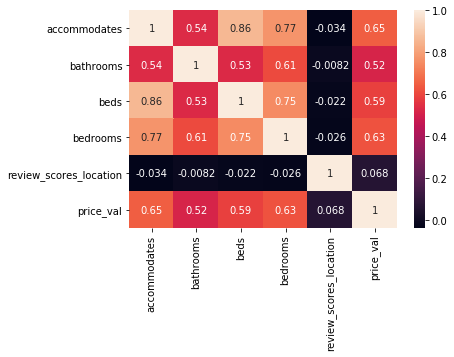

In [334]:
df_num = df[['accommodates','bathrooms', 'beds','bedrooms', 'review_scores_location', 'zipcode', 'property_type', 'room_type', 'price_val']]
sns.heatmap(df_num.corr(), annot = True)

In [313]:
# There are 7 numeric variables: accommodates, bathrooms, bedrooms, beds, zipcode, review_scores_location, review_scores_rating to consider, 
# due to the strong correlations between beds and berooms, beds and accommodates, I decided to drop beds. New properties may not have review scores yet
# Thus, I will drop review_scores_rating. The review_score_location rating is not strongly related with price, thus will be dropped. Therefore, the X variables include:
    # numeric:accommodates, bathrooms, bedrooms, zipcode
    # categorical: property_type, room_type

x = df[['accommodates','bathrooms', 'bedrooms', 'zipcode', 'property_type', 'room_type']]
x.head()

,accommodates,bathrooms,bedrooms,zipcode,property_type,room_type
0,4,1.0,1.0,98119,Apartment,Entire home/apt
1,4,1.0,1.0,98119,Apartment,Entire home/apt
2,11,4.5,5.0,98119,House,Entire home/apt
3,3,1.0,0.0,98119,Apartment,Entire home/apt
4,6,2.0,3.0,98119,House,Entire home/apt


In [315]:
# dummy categorical variables: neighbourhood_cleansed,property_type, room_type
obj_var_list1 = x.select_dtypes(include = ['object']).columns
for cat in obj_var_list1:
    x = pd.concat([x.drop(cat, axis = 1), pd.get_dummies(x[cat], prefix = cat, prefix_sep = '_')], axis = 1)

In [316]:
x.head()

,accommodates,bathrooms,bedrooms,zipcode_98101,zipcode_98102,zipcode_98103,zipcode_98104,zipcode_98105,zipcode_98106,zipcode_98107,...,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,4,1.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,4,1.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,11,4.5,5.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,3,1.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,6,2.0,3.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [374]:
y = df['price'].str.lstrip('$').str.replace(',', '').astype(float)
y.head()

0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64

In [318]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state= 42)
print(x_train.shape)
print(x_test.shape)

(2672, 50)
(1146, 50)


In [319]:
#check any missing values
x.isnull().sum()

accommodates                     0
bathrooms                        0
bedrooms                         0
zipcode_98101                    0
zipcode_98102                    0
zipcode_98103                    0
zipcode_98104                    0
zipcode_98105                    0
zipcode_98106                    0
zipcode_98107                    0
zipcode_98108                    0
zipcode_98109                    0
zipcode_98112                    0
zipcode_98115                    0
zipcode_98116                    0
zipcode_98117                    0
zipcode_98118                    0
zipcode_98119                    0
zipcode_98121                    0
zipcode_98122                    0
zipcode_98125                    0
zipcode_98126                    0
zipcode_98133                    0
zipcode_98134                    0
zipcode_98136                    0
zipcode_98144                    0
zipcode_98146                    0
zipcode_98177                    0
zipcode_98178       

In [320]:
#instantiate-->fit training -->predict -->score
lm_model = LinearRegression(normalize = True)
lm_model.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [321]:
y_test_preds = lm_model.predict(x_test)
y_train_preds = lm_model.predict(x_train)

In [322]:
y_test_preds

array([ 56.75 , 150.5  ,  78.625, ..., 446.   , 231.25 , 167.875])

In [323]:
correlations = pd.DataFrame({'name': list(x), 'value':lm_model.coef_})
correlations

,name,value
0,accommodates,1.011664e+01
1,bathrooms,2.928610e+01
2,bedrooms,3.119122e+01
3,zipcode_98101,6.164429e+01
4,zipcode_98102,4.347842e+01
5,zipcode_98103,1.714375e+01
6,zipcode_98104,6.102725e+01
7,zipcode_98105,1.370609e+01
8,zipcode_98106,-3.879773e+00
9,zipcode_98107,2.027290e+01


# Evaluation

### Evaluating results

In [324]:
r2_score(y_test, y_test_preds)

0.58512782640606

In [325]:
# overage housing price for the test data
np.mean(y_test_preds)

130.9437172774869

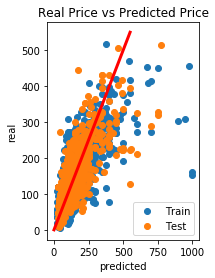

In [326]:
ax=plt.subplot(122, frameon=True)
ax.scatter(y_train, y_train_preds)
ax.scatter(y_test,y_test_preds)
ax.set_xlabel('predicted')
ax.set_ylabel('real')
ax.legend(['Train', 'Test'])
ax.title.set_text('Real Price vs Predicted Price')
ax.plot([0, 550], [0, 550], c='r', linewidth=3)

In [327]:
#Testing a new data point: an apartment property (room type: Entire home/apt) which can accommodates 4, have 1 bathroom, 1 bedrooms, with 10 on its location rating, 
#located in 98119
x.loc[1]

accommodates                     4.0
bathrooms                        1.0
bedrooms                         1.0
zipcode_98101                    0.0
zipcode_98102                    0.0
zipcode_98103                    0.0
zipcode_98104                    0.0
zipcode_98105                    0.0
zipcode_98106                    0.0
zipcode_98107                    0.0
zipcode_98108                    0.0
zipcode_98109                    0.0
zipcode_98112                    0.0
zipcode_98115                    0.0
zipcode_98116                    0.0
zipcode_98117                    0.0
zipcode_98118                    0.0
zipcode_98119                    1.0
zipcode_98121                    0.0
zipcode_98122                    0.0
zipcode_98125                    0.0
zipcode_98126                    0.0
zipcode_98133                    0.0
zipcode_98134                    0.0
zipcode_98136                    0.0
zipcode_98144                    0.0
zipcode_98146                    0.0
z

In [333]:
new_data = x.loc[1]
lm_model.predict([new_data])

array([152.75])

In [332]:
#In reality, the value is $150, very similar to the one that is estimated.
y.loc[1]

150.0

### Review process

* Data collected from Airbnb Seattle was used to explore the market saturation, visitors' rating on location, average housing price by neighborhood and property type, and build a multiple linear regression model to predict the price.
* Only subset of Airbnb listings with less than 40% missin values were selected for analysis
* Missing values were then replaced by using mean.
* Categorical variables, such as property type and room type, are dummied for the linear regression model.

### Determine next steps

* Include other years' data to predict
* Include other independent variables (features), especially amenity and other review scores.
* Apply the formula for new property owners to set price for their new listings